# Top

In [1]:
import fullcontrol as fc

# Utility Functions

In [18]:
def spiral(outer_size, num_turns, cw):
    """
    Generate a square spiral that reaches `outer_size` after `num_turns`.
    Returns a list of (x, y) coordinates.
    """
    if num_turns < 1:
        return [(0, 0)]

    num_segments = 4 * num_turns + 1

    step = outer_size / num_turns / 2
    x, y = 0, 0
    dx, dy = 1, 0  # initial direction: right
    coords = [(x, y)]

    for i in range(num_segments):
        f = (i // 2 + 1 * (i < num_segments - 1)) * step
        x += dx * f
        y += dy * f
        coords.append((x, y))
        if cw:
            dx, dy = dy, -dx  # rotate 90 degrees CW
        else:
            dx, dy = -dy, dx  # rotate 90 degrees CCW

    return coords

In [25]:
# Inspiration on:
# spiralXY(centre: Point, start_radius: float, end_radius: float, start_angle: float, n_turns: float, segments: int, cw: bool=False) -> list
def squareSpiral(center, size, n_turns: int, cw=False):
    steps = []
    for p in spiral(size, n_turns, cw):
        steps.append(fc.Point(x=p[0] + center.x, y=p[1] + center.y, z=center.z))
    return steps

# Design

## Parameters

In [35]:
# Parameters

design_name = 'my_design'
nozzle_temp = 220
bed_temp = 60
print_speed = 1000
fan_percent = 100
printer_name='ender_3' # generic / ultimaker2plus / prusa_i3 / ender_3 / cr_10 / bambulab_x1 / toolchanger_T0

EW = 0.4 # extrusion width
EH = 0.2 # extrusion height (and layer height)

## Simple

In [46]:
steps = []

steps.extend(fc.travel_to(fc.Point(x=0, y=0, z=.2)))
steps.append(fc.Point(x=100))
steps.append(fc.Point(y=100))
steps.append(fc.Point(x=0))
steps.append(fc.Point(y=0))

steps

[Extruder(on=False, units=None, dia_feed=None, relative_gcode=None, volume_to_e=None, total_volume=None, total_volume_ref=None, travel_format=None),
 Point(x=0.0, y=0.0, z=0.2, color=None),
 Extruder(on=True, units=None, dia_feed=None, relative_gcode=None, volume_to_e=None, total_volume=None, total_volume_ref=None, travel_format=None),
 Point(x=100.0, y=None, z=None, color=None),
 Point(x=None, y=100.0, z=None, color=None),
 Point(x=0.0, y=None, z=None, color=None),
 Point(x=None, y=0.0, z=None, color=None)]

## Complex

In [29]:
steps = []

z = EH

steps.append(fc.Extruder(on=True))
steps.append(fc.Point(x=2, y=2, z=z))
steps.append(fc.Point(x=2, y=200, z=z))
steps.append(fc.Extruder(on=False))

pt = fc.Point(x=20, y=20, z=z)
steps.append(pt)

steps.append(fc.Extruder(on=True))
steps.extend(fc.rectangleXY(pt, 100, 10, True))
steps.append(fc.Extruder(on=False))

pt = fc.Point(x=40, y=100, z=z)
steps.append(pt)
steps.append(fc.Extruder(on=True))
steps.extend(fc.spiralXY(pt, 3, 10, 0, 10, 1000, True))
steps.append(fc.Extruder(on=False))

pt = fc.Point(x=20, y=40, z=z)
steps.append(pt)
steps.append(fc.Extruder(on=True))
steps.extend(fc.squarewaveXY(pt, fc.Vector(x=1, y=0, z=0), 10, 2, 30))
steps.append(fc.Extruder(on=False))

pt = fc.Point(x=100, y=100, z=z)
steps.append(pt)
steps.append(fc.Extruder(on=True))
steps.extend(squareSpiral(pt, 80, 20, True))
# steps

# Visualization

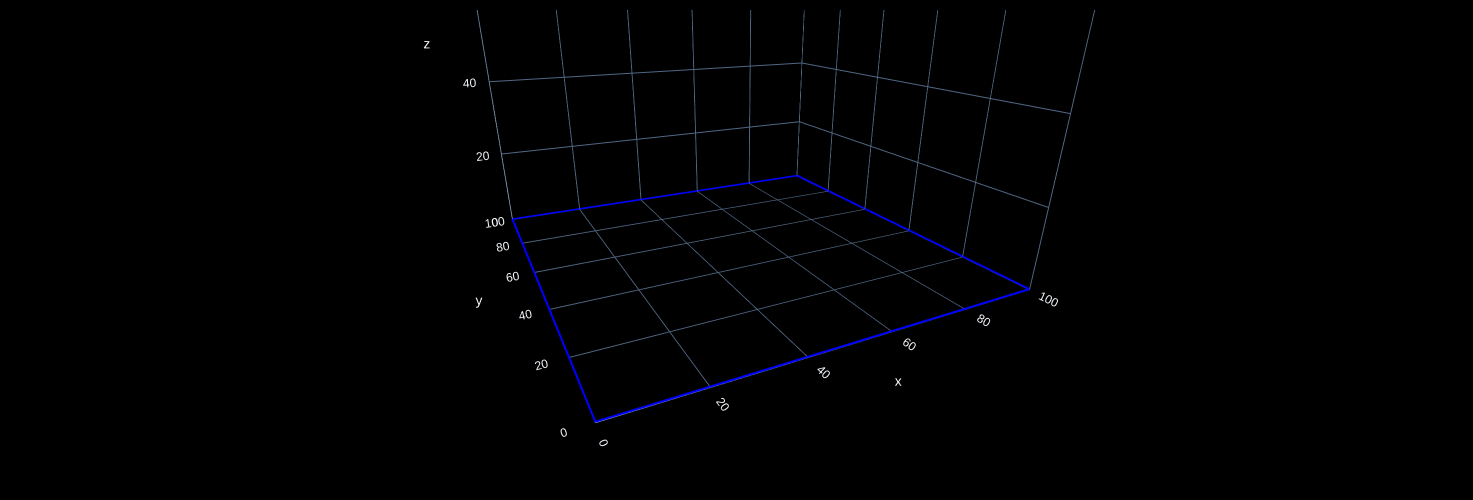

In [48]:
fc.transform(steps, 'plot', fc.PlotControls(style='line', zoom=.8))

# GCODE

In [36]:
gcode = fc.transform(
    steps,
    'gcode',
    controls=fc.GcodeControls(
        printer_name='generic',  # or ender_3
        initialization_data={
            'extrusion_width': .4,
            'extrusion_height': .2
        }
    )
)
#print(gcode)

In [37]:
gcode = fc.transform(
    steps,
    'gcode',
    fc.GcodeControls(
        printer_name=printer_name,
        initialization_data={
            'primer': 'front_lines_then_y',
            'print_speed': print_speed,
            'nozzle_temp': nozzle_temp,
            'bed_temp': bed_temp,
            'fan_percent': fan_percent,
            'extrusion_width': EW,
            'extrusion_height': EH},
        save_as=design_name,
        include_date=False
    )
)

In [41]:
for l in gcode.splitlines()[:50]:
    print(l)


;FLAVOR:Marlin
;TIME:0
;Filament used: 0m
;Layer height: 0
;MINX:0
;MINY:0
;MINZ:0
;MAXX:220
;MAXY:220
;MAXZ:250

; Time to print!!!!!
; GCode created with FullControl - tell us what you're printing!
; info@fullcontrol.xyz or tag FullControlXYZ on Twitter/Instagram/LinkedIn/Reddit/TikTok 

G28 ; home axes
M140 S60 ; set bed temp and continue
M105
M104 S220 ; set hotend temp and continue
M190 S60 ; set bed temp and wait
M105
M109 S220  ; set hotend temp and wait
G90 ; absolute coordinates
G21 ; set units to millimeters
M83 ; relative extrusion
M106 S255 ; set fan speed
M220 S100 ; set speed factor override percentage
M221 S100 ; set extrude factor override percentage
G0 F8000 X5 Y5 Z10
G1 F250 E20.7876
G0 F250 Z50
G0 F8000 X10 Y10 Z0.3
;-----
; END OF STARTING PROCEDURE
;-----

;-----
; START OF PRIMER PROCEDURE
;-----
G0 F8000 Y12 Z0.2
G1 F1000 X110 E3.326014
G1 Y14 E0.06652
G1 X10 E3.326014
G1 Y16 E0.06652
G1 X2 E0.266081
G1 Y2 E0.465642
;-----
; END OF PRIMER PROCEDURE
;-----
